<a href="https://colab.research.google.com/github/Prajaktahz/Uni_Colab_Work/blob/main/Week_7_Case_Study_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nlab.org.uk/wp-content/uploads/nlabmain.png" style="width:40%; clear:both; margin-bottom:-20px" align=left>
<br style="clear:both;"/>

## Analytics Specializations & Applications 2 - Week 7

# Text Analytics - Case Study Exercises
----------
Dr Georgiana Nica-Avram - University of Nottingham
[mail](mailto:georgiana.nica-avram1@nottingham.ac.uk)
[web](http://www.neodemographics.org)

This set of exercises assumes that you have completed the accompanying "Text Analytics - Preparatory Exercises" jupyter notebook. If you haven't, please find and run through that set of exercises first.

### Scenario
Now we have the tools we need, let's consider the following case study scenario. We are a consumer research company like IPSOS MORI, who are now receiving reviews and discussion on the web (particularly in the form of YouTube comments). We would like to generate a text analytics solution that will take these reviews (which we assume to be unstructured text alone), perform some text analytics on them, and then tell us if that review was positive or negative (to do this, we will need to perform sentiment analysis). Once we have a method of doing this we can score the success of our outputs in an automatic fashion (and also potentially gauge how reaction towards them changes over time).

The problem is that we currently have no basis for assessing reviews - our media outputs don't get "scored". This problem is called the "cold start" problem - we just don't have any ground truth which we can build a text analytics model against.

Luckily, we may be able to leverage some "transfer learning" - one of our partners has a dataset of movie reviews that **are** accompanied with a score - so we know if the text they include is broadly positive or negative.

By performing text analytics on this dataset and concentrating on sentiment (rather than movie actors, directors, genres, etc) we will be able to create a natural language model that will receive any review - such as those we get discussing our advertising campaigns - and tell us something about the author's reaction. This we can then document, and use in our future pitches.

### The dataset
Our transfer dataset consists of 25,000 written movie reviews from the Internet Movie Database, IMDb (www.imdb.com). No movie has more than 30 reviews, and the review text is accompanied by a binary score (with the value 1 if the IMDb rating for that review is greater than 6, and the value 0 if the rating is less than 5). From this data we will learn what constitutes a positive and negative review in terms of text).

To analyse this text, so we can understand what consitutes a positive and negative reivew in terms of language, we will implement the following:

* Data Collation
* Stripping / Case Folding
* Stemming
* Stopping
* Tokenization
* Vectorization (and TF-IDF)
* Testing (using Cosine Similarity)


In [1]:
# This next line is only to be used on Google Colaboratory and will download the CSV file for you
!wget -O week7_data.zip "https://drive.google.com/uc?export=download&id=1vxzKV3Z522JN67xnglQZJCniIQaypsY9"
!unzip week7_data.zip

# We can then check that the file is here by listing the content of the current directory
!ls

--2024-03-14 23:30:38--  https://drive.google.com/uc?export=download&id=1vxzKV3Z522JN67xnglQZJCniIQaypsY9
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.100, 142.251.2.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vxzKV3Z522JN67xnglQZJCniIQaypsY9&export=download [following]
--2024-03-14 23:30:38--  https://drive.usercontent.google.com/download?id=1vxzKV3Z522JN67xnglQZJCniIQaypsY9&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13859069 (13M) [application/octet-stream]
Saving to: ‘week7_data.zip’

week7_data.zip      100%[===================>]  13.22M  29.5MB/s    in

Let's begin by loading in the data

<span style="font-weight:bold; color:green;">&rarr; Load in and examine the first ten lines of the data <span/>

In [2]:
import pandas

data = pandas.read_csv("movie_data.tsv", delimiter="\t")

#-- examine the first 10 lines of the data here
data.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


Have a look at the last entry - see how it has html tags in it. We need to get rid of these (and let's loose the punctuation while we are at it), so let's first do some stripping. I've created a custom function to do this which is out of scope of this course, so for now just run the code below:

In [3]:
import html_cleaner

data.review = html_cleaner.remove_html(data.review)

#-- examine the first 10 lines of the data again
data.head(10)

/content/html_cleaner.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  BeautifulSoup(d, "html.parser").get_text()


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,This movie is full of references. Like \Mad Ma...


In [4]:
#-- describe the data here
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


We are going to learn a model that can recognize those reviews with positive sentiment form those with negative sentiment. Start by splitting the data into test and training sets (use the first 20,000 items for the training data and the rest for the test data).

<span style="font-weight:bold; color:green;">&rarr; Split the data into test and training <span/>

In [5]:
data.drop(["id"], axis = 1)
train_data = data[:20000]
test_data = data[20000:]

Ok, as before the next step is to vectorize our text data - let's do that next with a simple Count Vectorizer (and examine how much TF-IDF can improve things later).

<span style="font-weight:bold; color:green;">&rarr; Complete the following code <span/>

In [6]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

#-- create our vectorizer object, ready to fit and
#-- transform our data into a vector space format
vectorizer = CountVectorizer()

#-- setup the model's feature space using our training data
vectorizer.fit(train_data.review)

#-- and then convert the training data set into vector format
train_features = vectorizer.transform(train_data.review)

#-- while we are here, convert our test dataset in the same way
test_features = vectorizer.transform(test_data.review)

print("Training and test data successfully vectorized")

Training and test data successfully vectorized


Now let's create a model that will understand how sentiment is constructed out of text in some way. For this job we could use any classifier, but given Naive Bayes models have historically been used in text analysis, let's maintain that tradition here:

In [7]:
#-- let's use a multinomial naive bayes classifer
from sklearn.naive_bayes import BernoulliNB

NB = BernoulliNB()

#-- fit the model to our training data - note in this step the model is
#-- finding the relationship between word frequencies and the sentiment
#-- of each review
NB.fit(train_features, train_data.sentiment)
print("Linguistic Model successfuly created")

Linguistic Model successfuly created


Now let's see how well our model works, by testing it on our holdout dataset (note that we would normally cross-validate here to get a more representative score, but a single holdout test is fine for now):

In [8]:
#-- generate some predictions
results = NB.predict_proba(test_features)
print(results)

[[5.78165233e-01 4.21834767e-01]
 [9.93375916e-01 6.62408434e-03]
 [1.25287276e-02 9.87471272e-01]
 ...
 [9.99879156e-01 1.20843866e-04]
 [3.06619208e-01 6.93380792e-01]
 [4.53248215e-05 9.99954675e-01]]


The results come in two columns for each review - the first column is the probability that it is a negative review, and the second if it is a positive review. We can come up with an actual prediction of whether the review contains positive sentiment or not by seeing if the second column is > 0.5 or not (our threshold):

In [9]:
#-- note the neat syntax here: First we index the result's second column using
#-- [:,1] and then we test if it is more than 0.5 and hence a positive review
predictions = results[:,1] > 0.5

#-- the columns which were more than 0.5 are designated as True
print(predictions)

[False False  True ... False  True  True]


In [10]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_data.sentiment, predictions)
print("We predicted the sentiment of {0:.01f}% of reviews correctly".format(acc*100))

We predicted the sentiment of 84.7% of reviews correctly


84% is not bad at all, given we are using a simple and quick bag of words approach. In fact this is no doubt good enough for the business task, and we could start applying the model to our own reviews. In fact let's try some:

In [35]:
test_reviews = [
    "I'm not sure about this advert - it is selling a bad brand!",
    "I love this advert - it is selling a good brand!",
    "This is excellent work",
    "What is this rubbish?",
    "Please save us from this nonsense",
    "I enjoyed watching this",
    "I wanted to say this advert is bad, but I can't - just the opposite in fact!"
]

lowercase_reviews = [review.lower() for review in test_reviews]

print(lowercase_reviews)


["i'm not sure about this advert - it is selling a bad brand!", 'i love this advert - it is selling a good brand!', 'this is excellent work', 'what is this rubbish?', 'please save us from this nonsense', 'i enjoyed watching this', "i wanted to say this advert is bad, but i can't - just the opposite in fact!"]


In [46]:
#-- create some test "reviews"
test_reviews = [
    "I'm not sure about this advert - it is selling a bad brand!",
    "I love this advert - it is selling a good brand!",
    "This is excellent work",
    "What is this rubbish?",
    "Please save us from this nonsense",
    "I enjoyed watching this",
    "I wanted to say this advert is bad, but I can't - just the opposite in fact!"
]

lowercase_reviews = [review.lower() for review in test_reviews]  #--- added extra because words like 'This', 'this', were getting counted separately
#-- vectorize it
vec_test = vectorizer.transform( lowercase_reviews )

#-- Run it through your NB sentiment analyser
results = NB.predict_proba(vec_test)

#-- Examine the sentiment the model detects
for t, r in zip(lowercase_reviews, results):
    if r[1] > 0.5:
        print(t, "--> POSITIVE REVIEW")
    else:
        print(t, "--> NEGATIVE REVIEW")

i'm not sure about this advert - it is selling a bad brand! --> NEGATIVE REVIEW
i love this advert - it is selling a good brand! --> POSITIVE REVIEW
this is excellent work --> POSITIVE REVIEW
what is this rubbish? --> NEGATIVE REVIEW
please save us from this nonsense --> NEGATIVE REVIEW
i enjoyed watching this --> POSITIVE REVIEW
i wanted to say this advert is bad, but i can't - just the opposite in fact! --> NEGATIVE REVIEW


Not bad! Notice how almost all the reviews are categorized correctly... apart from the last one. With some carefully worded phrasing, we have tricked our model. Nonetheless even with a simple bag of words approach we have a useful tool for the business, which we can now use to track the companies influence.

However, we can do better as we've omitted some useful steps. Your challenge is now to see how much you can improve the results this model by implementing:
> * Stopping
> * Stemming
> * Case Folding
> * and a TfifdVectorizer()

Also consider:
> * What can you find out about the important features (i.e. which words are most influential?)
> * Can you design a query that fools the model? - tip. consider including negative words even though the review is good...

Good luck! And ask for help if you run out of ideas.

In [47]:
#-- Use the previous tutorials to do all of the
#-- above and try and build a better 'sentiment analyser'
#-- (i.e. one that manages to get any improvment at all on 84.7% accuracy!)

# BONNE CHANCE

In [48]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
# sentence tokenization
tokens = [nltk.sent_tokenize(review) for review in lowercase_reviews]
print(tokens)

[["i'm not sure about this advert - it is selling a bad brand!"], ['i love this advert - it is selling a good brand!'], ['this is excellent work'], ['what is this rubbish?'], ['please save us from this nonsense'], ['i enjoyed watching this'], ["i wanted to say this advert is bad, but i can't - just the opposite in fact!"]]


In [50]:
# word tokenization
tokens = [nltk.word_tokenize(review) for review in lowercase_reviews]
print(tokens)

[['i', "'m", 'not', 'sure', 'about', 'this', 'advert', '-', 'it', 'is', 'selling', 'a', 'bad', 'brand', '!'], ['i', 'love', 'this', 'advert', '-', 'it', 'is', 'selling', 'a', 'good', 'brand', '!'], ['this', 'is', 'excellent', 'work'], ['what', 'is', 'this', 'rubbish', '?'], ['please', 'save', 'us', 'from', 'this', 'nonsense'], ['i', 'enjoyed', 'watching', 'this'], ['i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', ',', 'but', 'i', 'ca', "n't", '-', 'just', 'the', 'opposite', 'in', 'fact', '!']]


In [51]:
# word tokenization that also splits all special symbols and treats them as separate units
tokens = [nltk.wordpunct_tokenize(review) for review in lowercase_reviews]
print(tokens)

[['i', "'", 'm', 'not', 'sure', 'about', 'this', 'advert', '-', 'it', 'is', 'selling', 'a', 'bad', 'brand', '!'], ['i', 'love', 'this', 'advert', '-', 'it', 'is', 'selling', 'a', 'good', 'brand', '!'], ['this', 'is', 'excellent', 'work'], ['what', 'is', 'this', 'rubbish', '?'], ['please', 'save', 'us', 'from', 'this', 'nonsense'], ['i', 'enjoyed', 'watching', 'this'], ['i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', ',', 'but', 'i', 'can', "'", 't', '-', 'just', 'the', 'opposite', 'in', 'fact', '!']]


In [52]:
# tokenises words, but not punctuation
tokenizer = nltk.RegexpTokenizer(r'\w+')

# tokenize the reviews
tokens = [tokenizer.tokenize(review) for review in lowercase_reviews]

print(tokens)

[['i', 'm', 'not', 'sure', 'about', 'this', 'advert', 'it', 'is', 'selling', 'a', 'bad', 'brand'], ['i', 'love', 'this', 'advert', 'it', 'is', 'selling', 'a', 'good', 'brand'], ['this', 'is', 'excellent', 'work'], ['what', 'is', 'this', 'rubbish'], ['please', 'save', 'us', 'from', 'this', 'nonsense'], ['i', 'enjoyed', 'watching', 'this'], ['i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', 'but', 'i', 'can', 't', 'just', 'the', 'opposite', 'in', 'fact']]


In [53]:
# flatten the list of tokens
flat_tokens = [token for sublist in tokens for token in sublist]
print(flat_tokens)

['i', 'm', 'not', 'sure', 'about', 'this', 'advert', 'it', 'is', 'selling', 'a', 'bad', 'brand', 'i', 'love', 'this', 'advert', 'it', 'is', 'selling', 'a', 'good', 'brand', 'this', 'is', 'excellent', 'work', 'what', 'is', 'this', 'rubbish', 'please', 'save', 'us', 'from', 'this', 'nonsense', 'i', 'enjoyed', 'watching', 'this', 'i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', 'but', 'i', 'can', 't', 'just', 'the', 'opposite', 'in', 'fact']


In [54]:
#--- see a distribution of the words in the text
fdist = nltk.FreqDist(flat_tokens)
display(fdist)

#-- list the 3 most common words in the text
print(fdist.most_common(3))

FreqDist({'this': 7, 'i': 5, 'is': 5, 'advert': 3, 'it': 2, 'selling': 2, 'a': 2, 'bad': 2, 'brand': 2, 'm': 1, ...})

[('this', 7), ('i', 5), ('is', 5)]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'i'),
  Text(1, 0, 'm'),
  Text(2, 0, 'not'),
  Text(3, 0, 'sure'),
  Text(4, 0, 'about'),
  Text(5, 0, 'this'),
  Text(6, 0, 'advert'),
  Text(7, 0, 'it'),
  Text(8, 0, 'is'),
  Text(9, 0, 'selling'),
  Text(10, 0, 'a'),
  Text(11, 0, 'bad'),
  Text(12, 0, 'brand'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'excellent'),
  Text(16, 0, 'work'),
  Text(17, 0, 'what'),
  Text(18, 0, 'rubbish'),
  Text(19, 0, 'please'),
  Text(20, 0, 'save'),
  Text(21, 0, 'us'),
  Text(22, 0, 'from'),
  Text(23, 0, 'nonsense'),
  Text(24, 0, 'enjoyed'),
  Text(25, 0, 'watching'),
  Text(26, 0, 'wanted'),
  Text(27, 0, 'to'),
  Text(28, 0, 'say'),
  Text(29, 0, 'but'),
  Text(30, 0, 'can'),
  Text(31, 0, 't'),
  Text(32, 0, 'just'),
  Text(33, 0, 'the'),
  Text(34, 

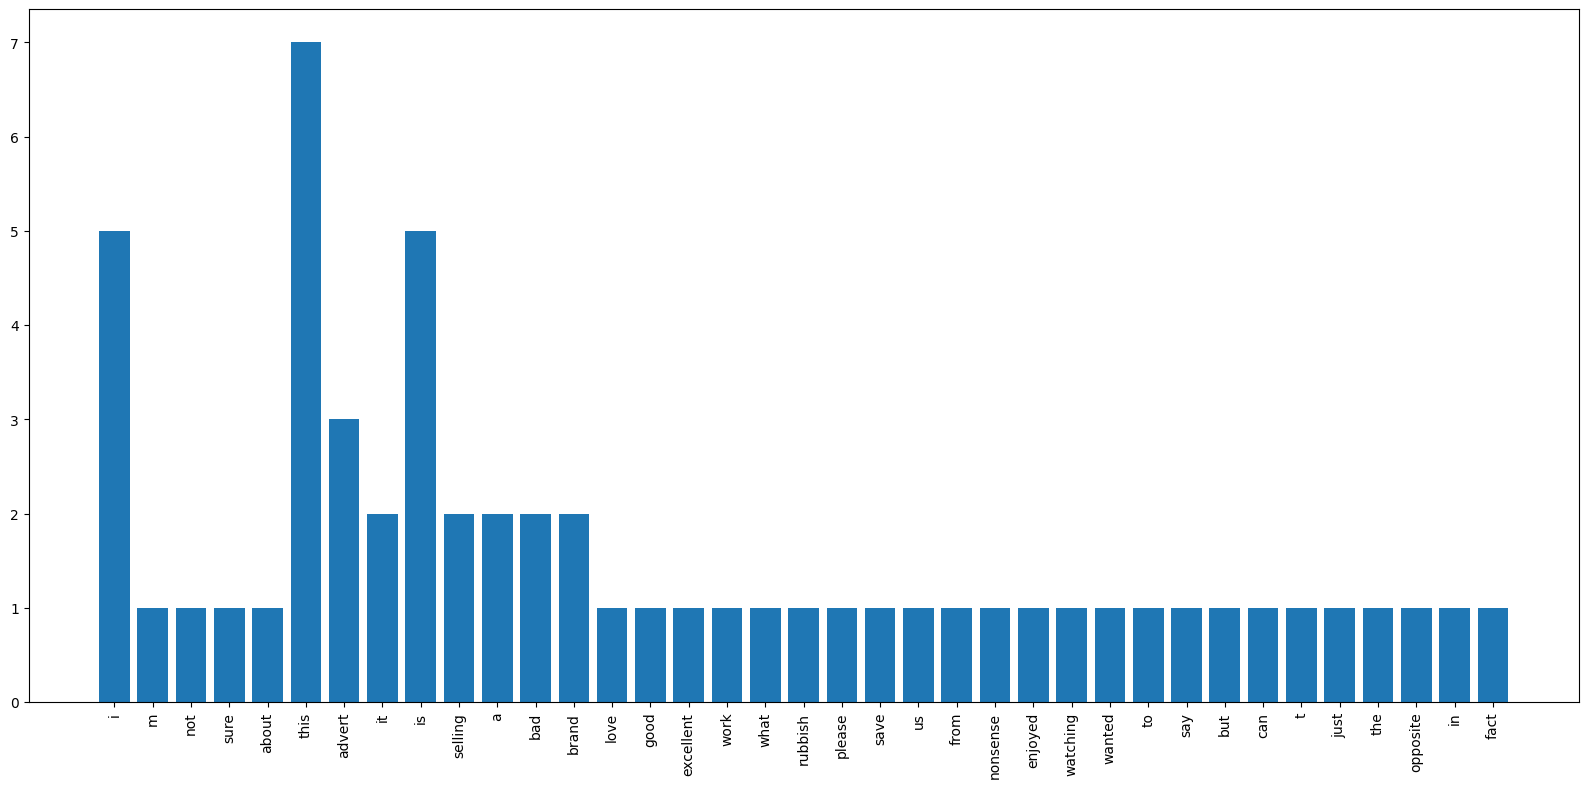

In [55]:
#-- and get a sense of the word counts visually
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 9.0)

plt.bar(fdist.keys(), fdist.values())
plt.xticks(rotation = 90) # labels are shown vertically

#-- if the above does not work on your version of python use the following:
#-- plt.bar(range(len(fdist)), fdist.values(), tick_label = fdist.keys())


<Axes: >

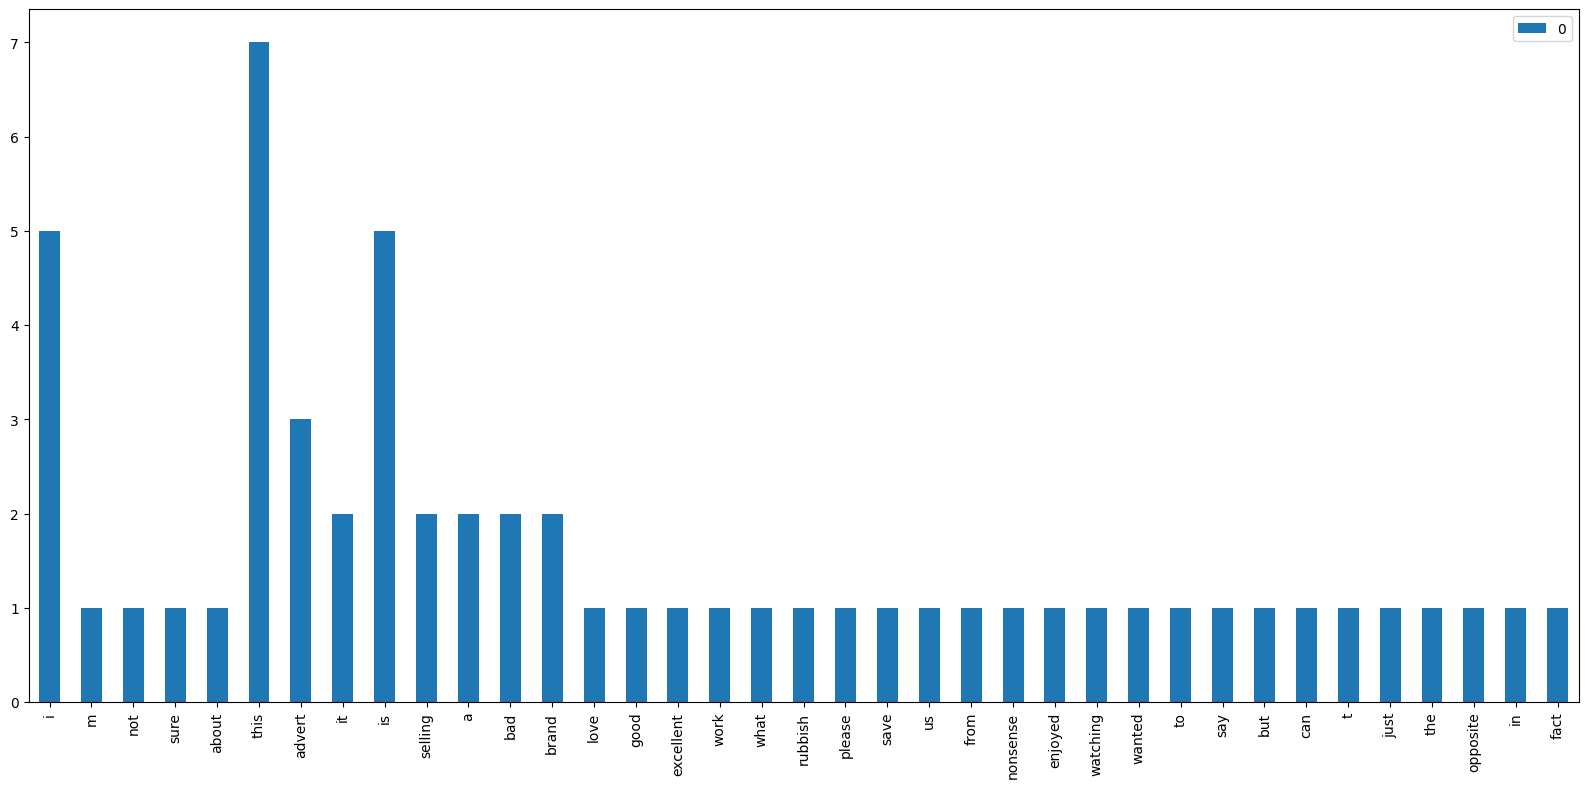

In [56]:
#-- another neat option is using pandas
import pandas

#-- convert the counter object into a pandas dataframe
df = pandas.DataFrame.from_dict(fdist, orient = "index")

#-- use the dataframes built in bar chart function
df.plot.bar()

array([<Axes: ylabel='0'>], dtype=object)

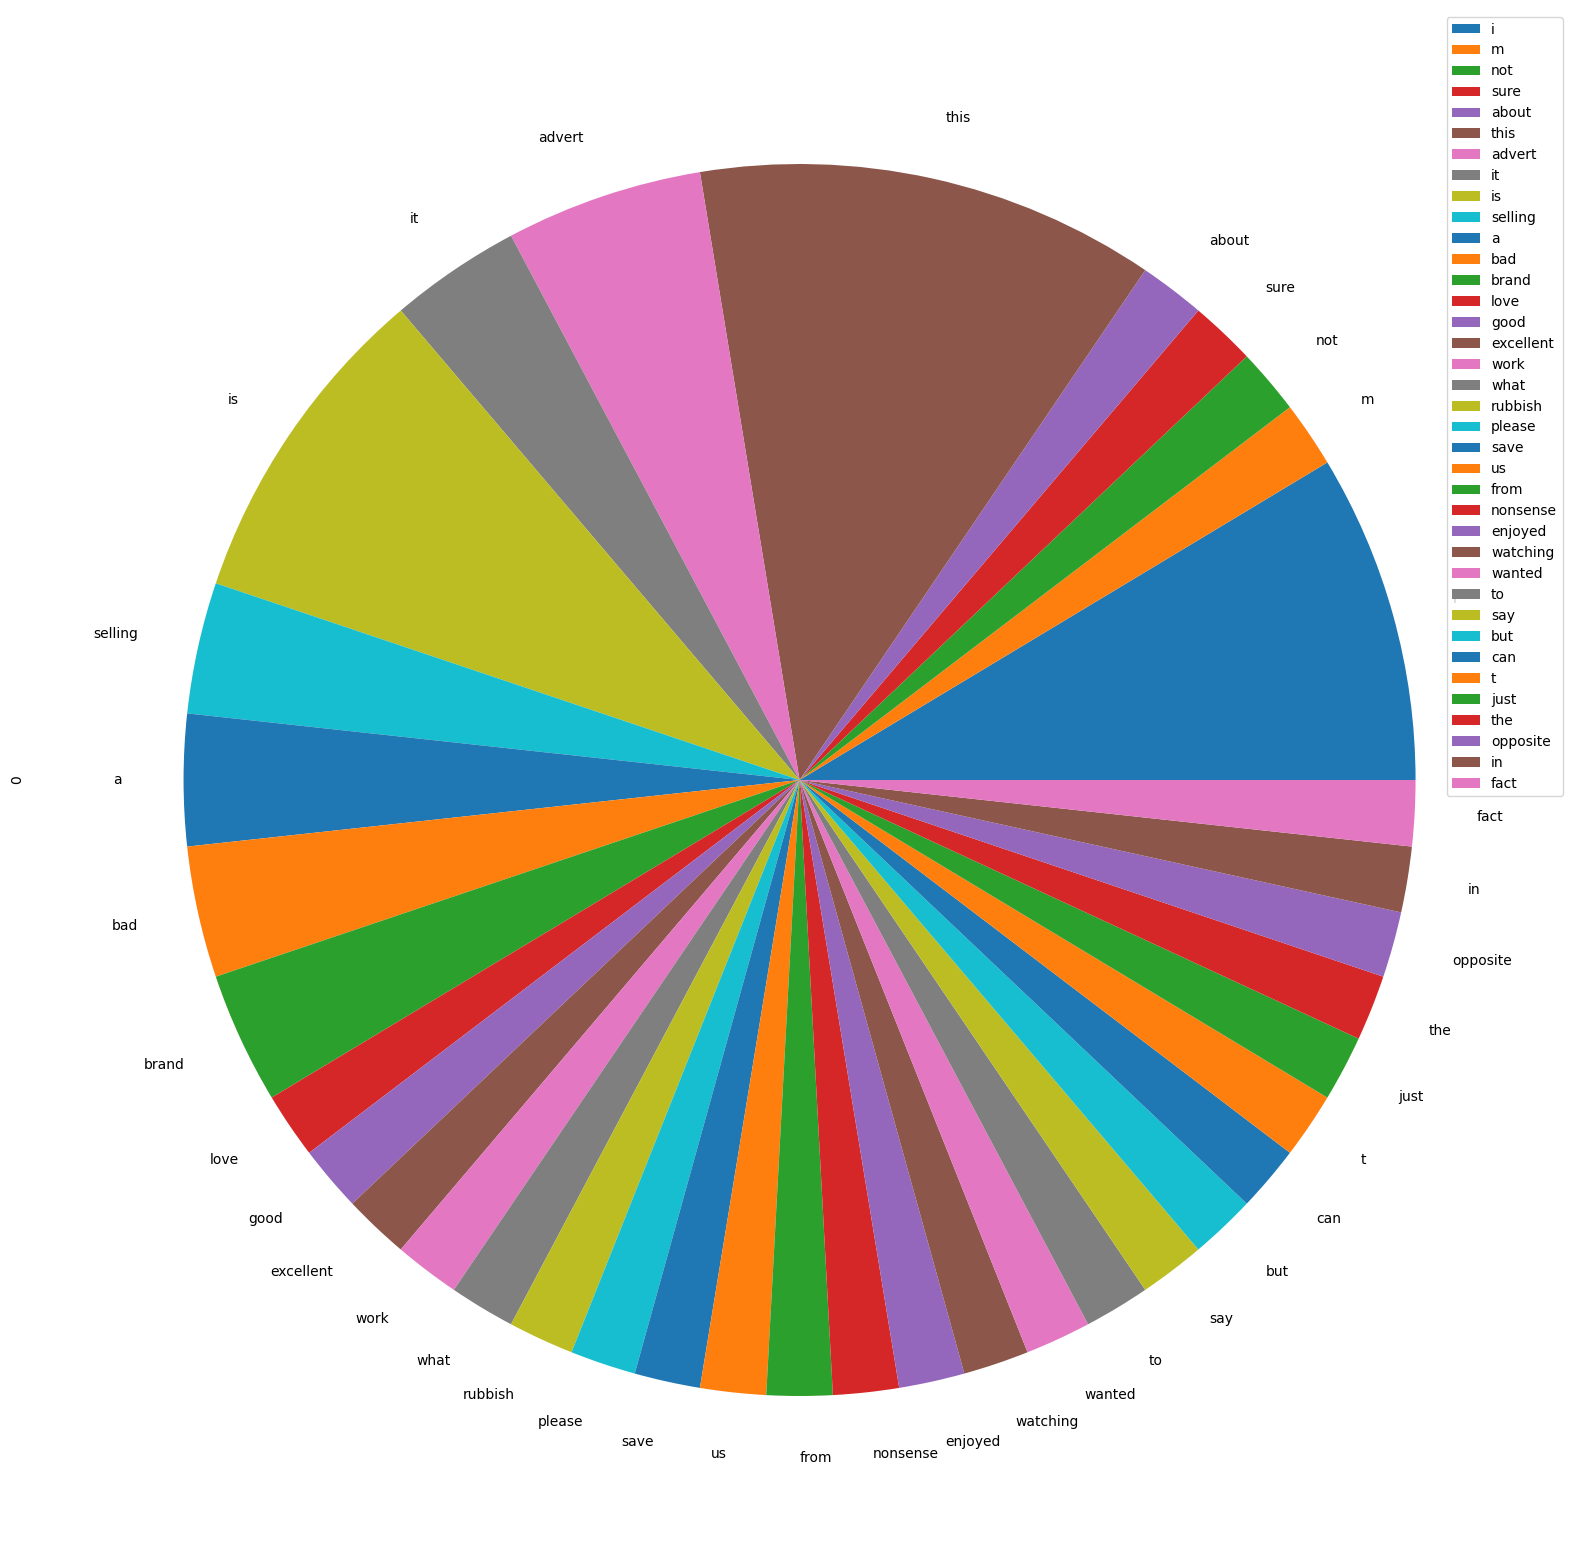

In [57]:
#-- or you might prefer a pie chart, given we only have a limited number of words...
df.plot.pie(subplots=True, figsize=(20,20))

**1. Removing Stop Words**

In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [67]:
from nltk.corpus import stopwords
remove_words = stopwords.words('english')
print(remove_words)    #--- why do we only use English here?

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [68]:
#-- One method for removing stop words from your token list
filtered_tokens = []
for t in flat_tokens:
    t = t.lower()
    if t not in remove_words:
        filtered_tokens.append(t)

#-- Examine the results
print("ORIGINAL SET OF TOKENS:", flat_tokens)
print("FILTERED FOR STOP WORDS:", filtered_tokens)

ORIGINAL SET OF TOKENS: ['i', 'm', 'not', 'sure', 'about', 'this', 'advert', 'it', 'is', 'selling', 'a', 'bad', 'brand', 'i', 'love', 'this', 'advert', 'it', 'is', 'selling', 'a', 'good', 'brand', 'this', 'is', 'excellent', 'work', 'what', 'is', 'this', 'rubbish', 'please', 'save', 'us', 'from', 'this', 'nonsense', 'i', 'enjoyed', 'watching', 'this', 'i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', 'but', 'i', 'can', 't', 'just', 'the', 'opposite', 'in', 'fact']
FILTERED FOR STOP WORDS: ['sure', 'advert', 'selling', 'bad', 'brand', 'love', 'advert', 'selling', 'good', 'brand', 'excellent', 'work', 'rubbish', 'please', 'save', 'us', 'nonsense', 'enjoyed', 'watching', 'wanted', 'say', 'advert', 'bad', 'opposite', 'fact']


In [69]:
#-- One method for removing stop words from your token list
stemmer = nltk.PorterStemmer()

for t in flat_tokens:
    print("{} --> {}".format(t, stemmer.stem(t)))

i --> i
m --> m
not --> not
sure --> sure
about --> about
this --> thi
advert --> advert
it --> it
is --> is
selling --> sell
a --> a
bad --> bad
brand --> brand
i --> i
love --> love
this --> thi
advert --> advert
it --> it
is --> is
selling --> sell
a --> a
good --> good
brand --> brand
this --> thi
is --> is
excellent --> excel
work --> work
what --> what
is --> is
this --> thi
rubbish --> rubbish
please --> pleas
save --> save
us --> us
from --> from
this --> thi
nonsense --> nonsens
i --> i
enjoyed --> enjoy
watching --> watch
this --> thi
i --> i
wanted --> want
to --> to
say --> say
this --> thi
advert --> advert
is --> is
bad --> bad
but --> but
i --> i
can --> can
t --> t
just --> just
the --> the
opposite --> opposit
in --> in
fact --> fact


In [71]:
#-- One method for removing stop words and stemming words in your documents
stemmed_text = ""
for t in flat_tokens:
    t = stemmer.stem(t.lower())
    if t not in remove_words:
        stemmed_text = stemmed_text + t + " "

#-- Examine the results
print("ORIGINAL SET OF TOKENS:", flat_tokens)
print()
print("FILTERED AND STEMMED:", stemmed_text)


ORIGINAL SET OF TOKENS: ['i', 'm', 'not', 'sure', 'about', 'this', 'advert', 'it', 'is', 'selling', 'a', 'bad', 'brand', 'i', 'love', 'this', 'advert', 'it', 'is', 'selling', 'a', 'good', 'brand', 'this', 'is', 'excellent', 'work', 'what', 'is', 'this', 'rubbish', 'please', 'save', 'us', 'from', 'this', 'nonsense', 'i', 'enjoyed', 'watching', 'this', 'i', 'wanted', 'to', 'say', 'this', 'advert', 'is', 'bad', 'but', 'i', 'can', 't', 'just', 'the', 'opposite', 'in', 'fact']

FILTERED AND STEMMED: sure thi advert sell bad brand love thi advert sell good brand thi excel work thi rubbish pleas save us thi nonsens enjoy watch thi want say thi advert bad opposit fact 
